In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, explained_variance_score
from math import sqrt

## 1. Load the tips dataset from either pydataset or seaborn.

In [5]:
tips_df = data("tips")
tips_df.sample(14)

,total_bill,tip,sex,smoker,day,time,size
23,15.77,2.23,Female,No,Sat,Dinner,2
137,10.33,2.00,Female,No,Thur,Lunch,2
157,48.17,5.00,Male,No,Sun,Dinner,6
238,32.83,1.17,Male,Yes,Sat,Dinner,2
29,21.70,4.30,Male,No,Sat,Dinner,2
93,5.75,1.00,Female,Yes,Fri,Dinner,2
83,10.07,1.83,Female,No,Thur,Lunch,1
244,18.78,3.00,Female,No,Thur,Dinner,2
14,18.43,3.00,Male,No,Sun,Dinner,4
138,14.15,2.00,Female,No,Thur,Lunch,2


## 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [6]:
# generate OLS model with formula y ~ x or target ~ independent variable
ols_model = ols('tip ~ total_bill', data=tips_df).fit()

In [10]:
# compute predictions and add to original dataframe
tips_df['yhat'] = ols_model.predict(tips_df['total_bill'])
tips_df.sample(14)

,total_bill,tip,sex,smoker,day,time,size,yhat
40,31.27,5.00,Male,No,Sat,Dinner,3,4.204386
59,11.24,1.76,Male,Yes,Sat,Dinner,2,2.100745
82,16.66,3.40,Male,No,Thur,Lunch,2,2.669978
206,16.47,3.23,Female,Yes,Thur,Lunch,3,2.650023
166,24.52,3.48,Male,No,Sun,Dinner,3,3.495471
70,15.01,2.09,Male,Yes,Sat,Dinner,2,2.496688
115,25.71,4.00,Female,No,Sun,Dinner,3,3.620450
48,32.40,6.00,Male,No,Sun,Dinner,4,4.323064
131,19.08,1.50,Male,No,Thur,Lunch,2,2.924137
13,15.42,1.57,Male,No,Sun,Dinner,2,2.539748


## 3. Plot the residuals for the linear regression model that you made.

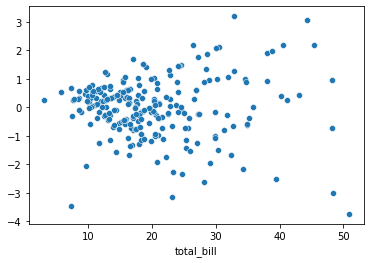

In [53]:
sns.scatterplot(x=tips_df.total_bill, y=(tips_df.yhat - tips_df.tip), data=tips_df)
plt.show()

## 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [17]:
sse2 = mean_squared_error(tips_df.tip, tips_df.yhat) * len(tips_df)
sse2

252.788743850776

In [18]:
ess = sum((tips_df.yhat - tips_df.tip.mean()) ** 2)
ess

212.4237331984042

In [19]:
tss = ess + sse2
tss

465.21247704918017

In [20]:
mse = mean_squared_error(tips_df.tip, tips_df.yhat)
mse

1.036019442011377

In [23]:
rmse = sqrt(mse)
rmse

1.0178504025697377

## 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [25]:
baseline_model = tips_df.tip.mean()
tips_df['yhat_baseline'] = baseline_model

In [26]:
sse2_baseline = mean_squared_error(tips_df.tip, tips_df.yhat_baseline) * len(tips_df)
sse2_baseline

465.2124770491804

In [27]:
ess_baseline = sum((tips_df.yhat_baseline - tips_df.tip.mean()) ** 2)
ess_baseline

0.0

In [29]:
tss_baseline = ess_baseline + sse2_baseline
tss_baseline

465.2124770491804

In [30]:
mse_baseline = mean_squared_error(tips_df.tip, tips_df.yhat_baseline)
mse_baseline

1.906608512496641

In [31]:
rmse_baseline = sqrt(mse_baseline)
rmse_baseline

1.3807999538298954

## 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [114]:
def compare_sum_squared_errors(model_sse2, baseline_sse2):
    delta = model_sse2 - baseline_sse2
    
    if (model_sse2 < baseline_sse2):
        print(f"The model performs better than the baseline with an SSE2 value of {model_sse2} and delta of {delta}")
        return True
    else:
        print(f"The baseline performs better than the model with an SSE2 value of {baseline_sse2} and delta of {delta}")
        return False

In [115]:
compare_sum_squared_errors(sse2, sse2_baseline)

The model performs better than the baseline with an SSE2 value of 252.788743850776 and delta of -212.4237331984044


True

## 7. What is the amount of variance explained in your model?

In [46]:
r2 = ols_model.rsquared
r2

0.45661658635167646

In [48]:
# Alternate method
r2_skl = explained_variance_score(tips_df.tip, tips_df.yhat)
r2_skl

0.4566165863516767

## 8. Is your model significantly better than the baseline model?

In [51]:
p_value = ols_model.f_pvalue
alpha = .05

(p_value, p_value < alpha)

(6.692470646863376e-34, True)

Since the p value is less than an alpha of .05, we can say that the correlation between the model and dependent variable is statistically significant, thus the model performs better than the baseline.

## 9. Create a file named evaluate.py that contains the following functions.

1. plot_residuals(y, yhat): creates a residual plot
2. regression_errors(y, yhat): returns the following values:
    * sum of squared errors (SSE)
    * explained sum of squares (ESS)
    * total sum of squares (TSS)
    * mean squared error (MSE)
    * root mean squared error (RMSE)
3. baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
4. better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false
5. model_significance(ols_model): that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether your model is significantly better than the baseline model (Hint: use the rsquared and f_pvalue properties from the ols model)

In [60]:
def plot_residuals(y, yhat):
    sns.scatterplot(x=y, y=yhat - y)
    plt.title("Residuals")
    plt.ylabel("yhat - y")
    plt.show()

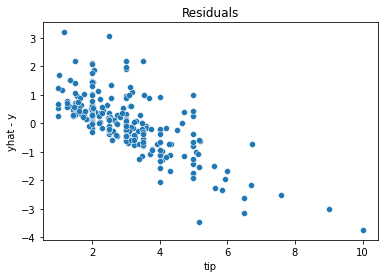

In [61]:
plot_residuals(tips_df.tip, tips_df.yhat)

In [62]:
def plot_residuals_against_x(x, y, yhat, df):
    sns.scatterplot(x=x, y=(yhat - y), data=df)
    plt.title("Residuals")
    plt.ylabel("yhat - y")
    plt.show()

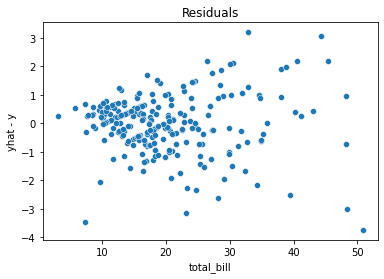

In [63]:
plot_residuals_against_x(tips_df.total_bill, tips_df.tip, tips_df.yhat, tips_df)

In [64]:
def regression_errors(y, yhat):
    sse2 = mean_squared_error(y, yhat) * len(y)
    ess = sum((yhat - y.mean()) ** 2)
    tss = ess + sse2
    mse = mean_squared_error(y, yhat)
    rmse = sqrt(mse)
    
    return sse2, ess, tss, mse, rmse

In [65]:
regression_errors(tips_df.tip, tips_df.yhat)

(252.788743850776,
 212.4237331984042,
 465.21247704918017,
 1.036019442011377,
 1.0178504025697377)

In [112]:
def baseline_mean_errors(y):
    index = []
    
    for i in range(1, len(y) + 1):
        index.append(i)
        
    y_mean = pd.Series(y.mean(), index=index)

    sse2_baseline = mean_squared_error(y, y_mean) * len(y)
    mse_baseline = mean_squared_error(y, y_mean)
    rmse_baseline = sqrt(mse_baseline)
    
    return sse2_baseline, mse_baseline, rmse_baseline

In [113]:
baseline_mean_errors(tips_df.tip)

(465.2124770491804, 1.906608512496641, 1.3807999538298954)

In [116]:
def better_than_baseline(y, yhat):
    sse2, ess, tss, mse, rmse = regression_errors(y, yhat)
    sse2_baseline, mse_baseline, rmse_baseline = baseline_mean_errors(y)
    
    return compare_sum_squared_errors(sse2, sse2_baseline)

In [117]:
better_than_baseline(tips_df.tip, tips_df.yhat)

The model performs better than the baseline with an SSE2 value of 252.788743850776 and delta of -212.4237331984044


True

In [118]:
def model_signficance(ols_model):
    r2 = ols_model.rsquared
    p_value = ols_model.f_pvalue
    alpha = .05

    print(f"variance:  {r2}, p:  {p_value}, a: {alpha},  signficant:  {p_value < alpha}")
    return r2, p_value, p_value < alpha

In [119]:
model_signficance(ols_model)

variance:  0.45661658635167646, p:  6.692470646863376e-34, a: 0.05,  signficant:  True


(0.45661658635167646, 6.692470646863376e-34, True)